### Black Friday EDA And Feature Engineeing 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
# Rememeber Always Combine your test and train for eda and FE. Especially in kaggle
df=pd.merge(df_train,df_test,how='outer')

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df=df.drop(['User_ID'],axis=1)

In [6]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [7]:
numerical_features=[]
categorical_features=[]
features= df.columns

for i in features:
    if df[i].dtype=='O':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [8]:
df1=df.copy()

In [9]:
df1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [34]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
# First way of encoding

a=df1['Age'].value_counts().to_dict()
df1['Age']=df1['Age'].map(a)
df1['Age'].unique()

array([ 21334,  30579, 313015,  65278,  54784, 156724, 141953],
      dtype=int64)

In [38]:
# Second way of encoding

df2=df.copy()
a1=df['Age'].value_counts().reset_index()
a3=a1['Age'].sort_values(ascending=True).values

label1={}

for i,k in enumerate(a3,0):
    label1[k]=i



df2['Age']=df2['Age'].map(label1)

In [44]:
df2['Gender'].unique()

array(['F', 'M'], dtype=object)

In [48]:
#Gender Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2['Gender']=lb.fit_transform(df2['Gender'])

In [57]:
#Oridnal encoding of  df2['City_Category']
df2['City_Category'].unique()

label={
    'A': 0,
    'B': 1,
    'C': 2
}
df2['City_Category']=df2['City_Category'].map(label)

In [65]:
df2['Stay_In_Current_City_Years'].unique()
label3={
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+':4
}
df2['Stay_In_Current_City_Years']=df2['Stay_In_Current_City_Years'].map(label3)


In [91]:
df2['Product_Category_2']=df2['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df2['Product_Category_3']=df2['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

Product_Category_2
8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [100]:
df2

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,2,15,1,4,1,8,8.0,16.0,NaN
783663,P00254642,0,2,15,1,4,1,5,8.0,16.0,NaN
783664,P00031842,0,2,15,1,4,1,1,5.0,12.0,NaN
783665,P00124742,0,4,1,2,4,0,10,16.0,16.0,NaN


<Axes: xlabel='Age', ylabel='Purchase'>

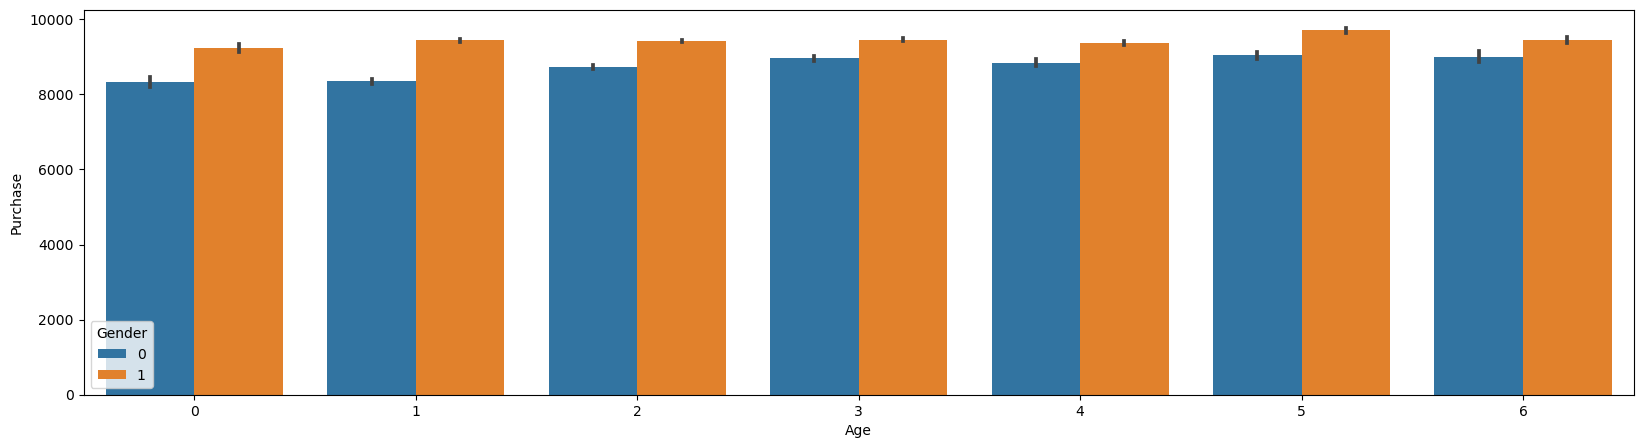

In [115]:
plt.figure(figsize=(20,5))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df2)

<Axes: xlabel='Occupation', ylabel='Purchase'>

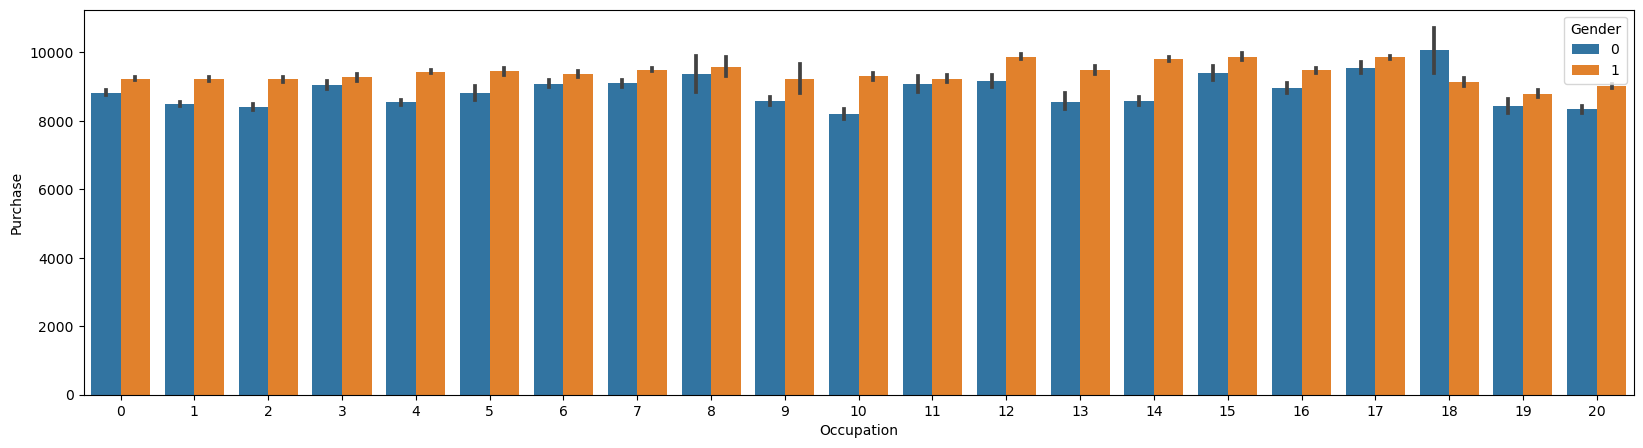

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df2)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

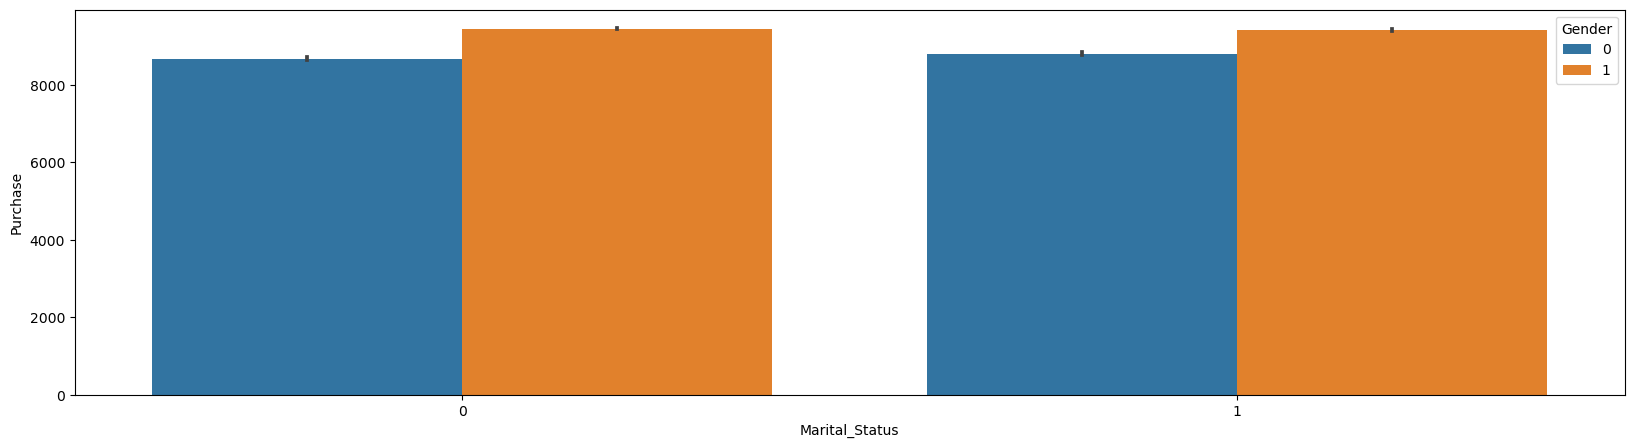

In [116]:
plt.figure(figsize=(20,5))
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender', data=df2)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

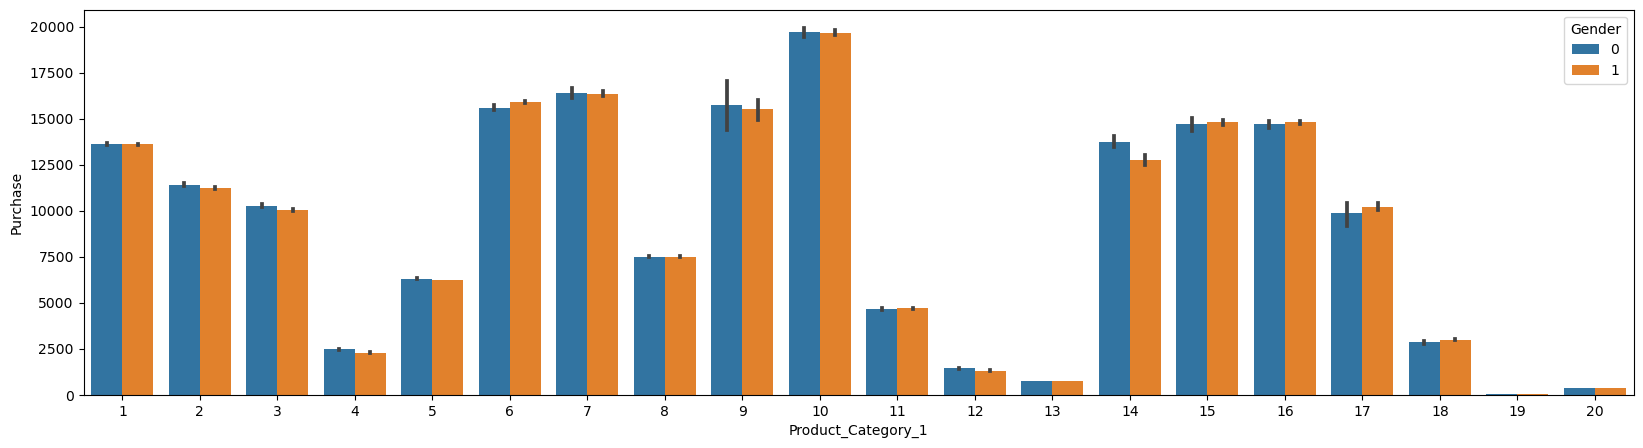

In [118]:
plt.figure(figsize=(20,5))
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df2)

<Axes: xlabel='City_Category', ylabel='Purchase'>

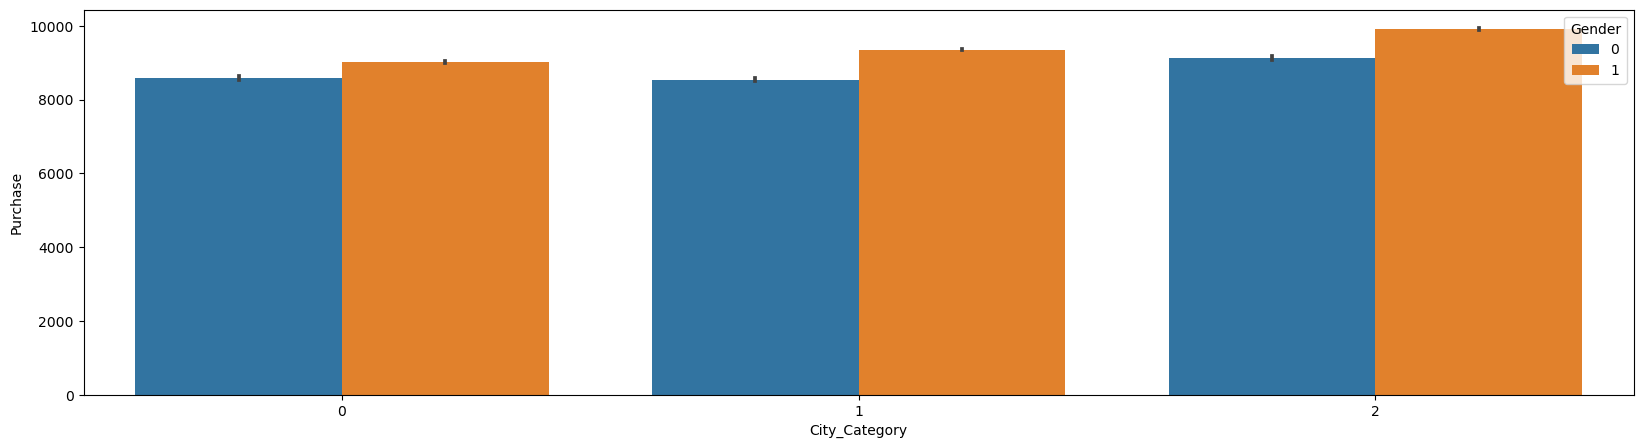

In [119]:
plt.figure(figsize=(20,5))
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=df2)

In [146]:
df_train=df2[~df2['Purchase'].isnull()]
df_test=df2[df2['Purchase'].isnull()]
df_test=df_test.drop(['Purchase','Product_ID'],axis=1)
df_train=df2.drop(['Product_ID'],axis=1)

In [149]:
X=df_train.drop(['Purchase'],axis=1)
y=df_train['Purchase']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [153]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)